In [343]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_data_to_load = "mouse_drug_data.csv"
clinical_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_data_to_load)
clinical_data = pd.read_csv(clinical_data_to_load)

# Combine the data into a single dataset
full_data = pd.merge(clinical_data, mouse_data, on="Mouse ID")

# Display the data table for preview
full_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [344]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_per_group = full_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_per_group = pd.DataFrame(mean_tumor_per_group).reset_index()

# Preview DataFrame
mean_tumor_per_group.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [345]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_per_group = full_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
sem_tumor_per_group = pd.DataFrame(sem_tumor_per_group).reset_index()

# Preview DataFrame
sem_tumor_per_group.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [346]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_per_group_pivot_table = pd.pivot(mean_tumor_per_group["Timepoint"], 
                                            mean_tumor_per_group["Drug"], 
                                            mean_tumor_per_group["Tumor Volume (mm3)"])

# Preview that Reformatting worked
mean_tumor_per_group_pivot_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


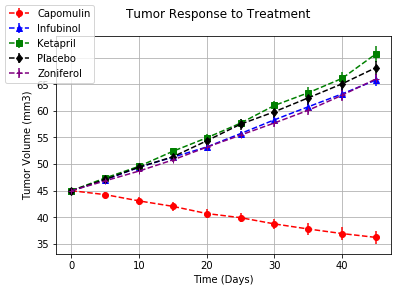

In [347]:
# Generate the Plot (with Error Bars)

drug_types = ["Capomulin", "Infubinol", "Ketapril", "Placebo", "Zoniferol"]

colors = ["red", "blue", "green", "black", "purple"]
style = ["o--", "^--", "s--", "d--", "+--"]

fig, ax = plt.subplots()
[ax.errorbar(mean_tumor_per_group_pivot_table.index, 
             mean_tumor_per_group_pivot_table[drug_types[item]], 
             yerr=sem_tumor_per_group.loc[sem_tumor_per_group["Drug"]== drug_types[item]]["Tumor Volume (mm3)"], 
             fmt=style[item], color=colors[item]) for item in np.arange(5)]

ax.grid()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
fig.suptitle("Tumor Response to Treatment")
fig.legend(loc="upper left")

# Save the Figure
fig.savefig("./tumor_response_to_treatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [348]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_per_group = full_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_meta_per_group = pd.DataFrame(mean_meta_per_group).reset_index()

# Preview DataFrame
mean_meta_per_group.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [349]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_meta_per_group = full_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
sem_meta_per_group = pd.DataFrame(sem_meta_per_group).reset_index()

# Preview DataFrame
sem_meta_per_group.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [350]:
# Minor Data Munging to Re-Format the Data Frames
mean_meta_per_group_pivot_table = pd.pivot(mean_meta_per_group["Timepoint"], mean_meta_per_group["Drug"], mean_meta_per_group["Metastatic Sites"])

# Preview that Reformatting worked
mean_meta_per_group_pivot_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


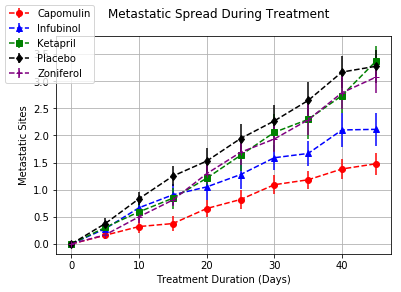

In [351]:
# Generate the Plot (with Error Bars)

drug_types = ["Capomulin", "Infubinol", "Ketapril", "Placebo", "Zoniferol"]

colors = ["red", "blue", "green", "black", "purple"]
style = ["o--", "^--", "s--", "d--", "+--"]

fig, ax = plt.subplots()
[ax.errorbar(mean_meta_per_group_pivot_table.index, 
             mean_meta_per_group_pivot_table[drug_types[item]], 
             yerr=sem_meta_per_group.loc[sem_meta_per_group["Drug"]== drug_types[item]]["Metastatic Sites"], 
             fmt=style[item], color=colors[item]) for item in np.arange(5)]

ax.grid()
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Metastatic Sites")
fig.suptitle("Metastatic Spread During Treatment")
fig.legend(loc="upper left")

# Save the Figure
fig.savefig("./Metastatic_spread_during_treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [352]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group_by_drug_time = full_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mice_group_by_drug_time = pd.DataFrame(mice_group_by_drug_time).reset_index()

# Preview DataFrame
mice_group_by_drug_time.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [353]:
# Minor Data Munging to Re-Format the Data Frames
mice_survival_pivot_table = pd.pivot(mice_group_by_drug_time["Timepoint"], mice_group_by_drug_time["Drug"], mice_group_by_drug_time["Mouse ID"])

# Preview the Data Frame
mice_survival_pivot_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


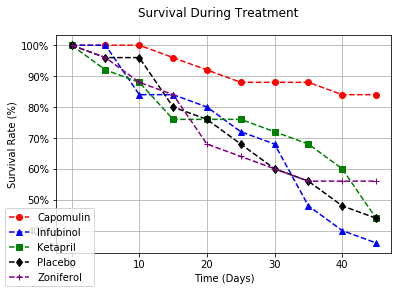

In [354]:
# Generate the Plot (with Error Bars)

drug_types = ["Capomulin", "Infubinol", "Ketapril", "Placebo", "Zoniferol"]

colors = ["red", "blue", "green", "black", "purple"]
style = ["o--", "^--", "s--", "d--", "+--"]

fig, ax = plt.subplots()
[ax.errorbar(mice_survival_pivot_table.index, 
             mice_survival_pivot_table[drug_types[item]]/mice_survival_pivot_table[drug_types[item]][0], 
             fmt=style[item], color=colors[item]) for item in np.arange(5)]

ax.grid()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
y_vals = ax.get_yticks()
ax.set_yticklabels(["{:,.0%}".format(x) for x in y_vals])
fig.suptitle("Survival During Treatment")
fig.legend(loc="lower left")

# Save the Figure
fig.savefig("./survival_during_treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [355]:
# Calculate the mean percent changes for each drug
mean_tumor_by_drug_time = full_data.groupby(["Timepoint", "Drug"])["Tumor Volume (mm3)"].mean()
mean_tumor_by_drug_time = pd.DataFrame(mean_tumor_by_drug_time).reset_index()
mean_tumor_by_drug_time_pivot_table = pd.pivot(mean_tumor_by_drug_time["Timepoint"], 
                                          mean_tumor_by_drug_time["Drug"], 
                                          mean_tumor_by_drug_time["Tumor Volume (mm3)"])

mean_percent_change = (mean_tumor_by_drug_time_pivot_table.iloc[-1,:] - mean_tumor_by_drug_time_pivot_table.iloc[0,:])/mean_tumor_by_drug_time_pivot_table.iloc[0,:] * 100
                                   

# Display the data to confirm
mean_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

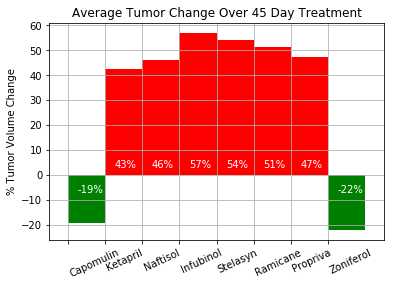

In [356]:
# Store all Relevant Percent Changes into a Tuple
mean_percent_change = [mean_percent_change[item] for item in np.arange(8)]

# Splice the data between passing and failing drugs
passing = []
failing = []
colors = []

for item in np.arange(8):
    if mean_percent_change[item] < 0:
        passing.append(full_data["Drug"].unique()[item])
        colors.append("green")
    else:
        failing.append(full_data["Drug"].unique()[item])
        colors.append("red")
    

# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(8)
plt.xticks(x_axis, full_data["Drug"].unique(), rotation=25,
           ha="left")
plt.bar(x_axis, mean_percent_change, color=colors,
        align="edge", width=1)
plt.xlim(-0.5, 8.5)
plt.grid()
plt.ylabel("% Tumor Volume Change")
plt.title("Average Tumor Change Over 45 Day Treatment")

# Use functions to label the percentages of changes
formatted = [format(item,".0f")+"%" for item in mean_percent_change]
y_value = [-7, 3, 3, 3, 3, 3, 3, -7]
[plt.text(item+0.25, y_value[item], formatted[item], color="white") for item in np.arange(8)]

# Save the Figure
fig.savefig("./tumor_change_over_45day_treatment.png")

# Show the Figure
plt.show()


## Observable trends based on data.

- There are only two treatments passing the test. 
- Treatment Capomulin performs best in those 8 treatments. The group that used Capomulin had a higthest survival rating and a significant decrese in tumor volume. 
- Treatment Zoniferol performs pale in those 8 treatments. The group that used Zoniferol only had a mid 50% survival rating, and it had a high spread speed in Metastatic Sites. 